###**TASK 2**

####**Predicting Using Unsupervised Machine Learning**

##### **NAME: DINESHKUMAR ANBALAGAN**

####**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually**

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd #IMPORTING PANDAS 
import numpy as np #IMPORTING NUMPY 
import matplotlib.pyplot as plt #IMPORTING VISUALIZATION LIBRARY 
import seaborn as sns #IMPORTING VISUALIZATION LIBRARY 
from sklearn.model_selection import train_test_split #TEST TRAIN SPLIT
from sklearn.cluster import KMeans #IMPORTING KMEANS
print('LIBRARIES IMPORTED')

LIBRARIES IMPORTED


In [ ]:
#READING THE DATASET
iris=pd.read_csv('Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#DROPPINF UNWANTED COLUMN:
iris.drop('Id',inplace=True, axis=1)

In [ ]:
#ANALYSING THE DATASET:
print('Dimension of dataset:{}'.format(iris.shape),'\n',140*'-')
print('Number of duplicated values:{}'.format(iris.duplicated().sum()),'\n',140*'-')
print('rows contain null values:\n{}'.format(iris.isnull().sum()),'\n',140*'-')
print('Schema of the dataset:\n{}'.format(iris.info()),'\n',140*'-')
print('Descriptive Analysis:\n{}'.format(iris.describe()),'\n',140*'-')
print('Correlation:\n{}'.format(iris.corr()),'\n',140*'-')
print('Count of each unique Species:\n{}'.format(iris['Species'].value_counts()))

Dimension of dataset:(150, 5) 
 --------------------------------------------------------------------------------------------------------------------------------------------
Number of duplicated values:3 
 --------------------------------------------------------------------------------------------------------------------------------------------
rows contain null values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 
 --------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Spec

In [ ]:
#REMOVING DUPLICATE VALUES:
pd.DataFrame.drop_duplicates(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#FINDING SUITABLE NUMBER OF CLUSTERS WITH THE HELP OF ELBOW PLOT
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, 
                    n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

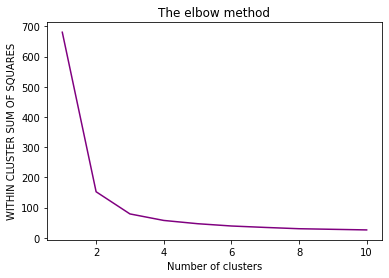

In [ ]:
#VISUALIZING RESULTS THROUGH ELBOW PLOT:
plt.plot(range(1, 11), wcss, color='purple')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WITHIN CLUSTER SUM OF SQUARES')
plt.show()

##### **FROM THE ABOVE PLOT IT IS VERY MUCH CLEAR THAT THE OPTIMAL NUMBER OF CLUSTERS FOR CLUSTERING IS 3**

In [ ]:
#KMEANS:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

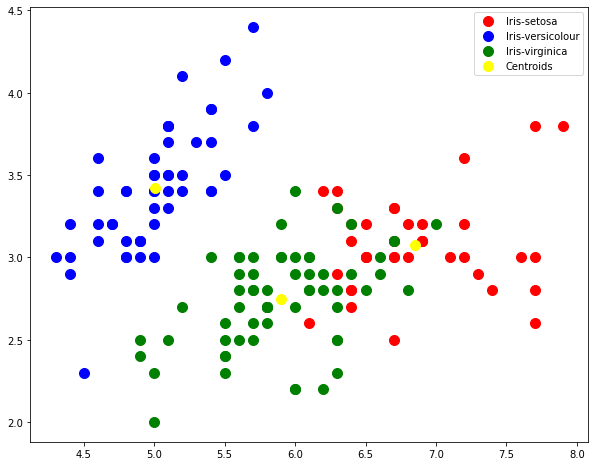

In [ ]:
#VISUALIZING THE CLUSTERS:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red',
            label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue',
            label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green',
            label = 'Iris-virginica')

#CENTROIDS:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()